# Lab 01: Data pre-processing

- Student ID: 21127734
- Student name: Huỳnh Sỉ Kha

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style=color:yellow>All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'/opt/homebrew/anaconda3/envs/dm-env/bin/python'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
# Read raw data ./data/spaceX_laucnh.csv
raw_df = pd.read_csv('./data/spaceX_laucnh.csv')

In [7]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [8]:
# Calculate the number of rows and columns and store in shape(tuple)
shape = raw_df.shape

In [9]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

- Each line in the file represents a single launch event, with various details about that event:
  - uct_time:Launch date in UTC format.,
  - launch_name:Launch name. Typically the name of the space mission.,
  - payloads:The list information about the payloads on the launch.,
  - rocket_name:The name of the rocket.,
  - rocket_boosters:The number of boosters on the rocket.,
  - rocket_height:The height information about the rocket (m).,
  - rocket_diameter:The diameter information about the rocket (m).,
  - rocket_mass:The mass information about the rocket (kg).,
  - launchpad_name:The name of the launchpad.,
  - launchpad_region:The region of the launchpad.,
  - launchpad_geo:The geo location of the launchpad.,
  - landpad:The landpad information.,
  - landpad_name:The name of the landing pad.,
  - landpad_type:The type of the landing pad.,
  - landpad_region:The region of the landing pad.,
  - landpad_geo:The geo location of the landing pad.,
  - outcome:Boolean indicating launch success or failure.

- Yes, it is crucial that every lines in this dataset has the same meaning. If each line had different meanings, issue could arise:
  - Data inconsistency: It hards for comparison and aggregation purposes for meaning analysis.
  - Inaccurate result: Leading to misunderstanding and misinterpretations of data.
  - Difficulty in data preprocessing: With varied line meanings, much of the data processing would need to be custom-developed, increasing the complexity and time required for data handling.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [10]:
# Calculate the number of duplicate indexes and store in num_duplicated_rows, in a group of lines with the same index, the first line is not counted as a duplicate
num_duplicated_rows = raw_df.index.duplicated().sum()

In [11]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file metadata.json in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [12]:
# Read the file ./data/metadata.json and store in metadata
with open('./data/metadata.json') as f:
    metadata = json.load(f)

In [13]:
# TEST
metadata

{'title': 'SpaceX Launches 2006-2022',
 'description': 'The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets from 2006 to 2022. The dataset contains information about launch dates, launchers, payloads, rockets, launchers, and landing pad wings. The data set also contains information about the landing results of each space mission represented by boolean values. This data set is third-party statistics, so it may deviate from reality.',
 'source': 'https://api.spacexdata.com/v5/launches/latest',
 'certificate_link': 'https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme',
 'certificate': 'Apache-2.0',
 'attributions': {'uct_time': 'Launch date in UTC format.',
  'launch_name': 'Launch name. Typically the name of the space mission.',
  'payloads': 'The list information about the payloads on the launch.',
  'rocket_name': 'The name of the rocket.',
  'rocket_boosters': 'The number of boosters on the rocket.',
  'rocket_h

**TODO: Describe datatype**

1. **uct_time**: _String_
2. **launch_name**: _String_
3. **payloads**: _String_ or _JSON_
4. **rocket_name**: _String_
5. **rocket_boosters**: _Integer_
6. **rocket_height**: _Float_
7. **rocket_diameter**: _Float_
8. **rocket_mass**: _Float_
9. **launchpad_name**: _String_
10. **launchpad_region**: _String_
11. **launchpad_geo**: _String_ or _Tuple_ (Latitude, Longitude)
12. **landpad**: _String_
13. **landpad_name**: _String_
14. **landpad_type**: _String_
15. **landpad_region**: _String_
16. **landpad_geo**: _String_ or _Tuple_ (Latitude, Longitude)
17. **outcome**: _Boolean_

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [14]:
# Calculate the data type of each column and store into Series dtypes, this series has the index as the column name
dtypes = raw_df.dtypes

In [15]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [16]:
# Convert the data type of uct_time to datetime
raw_df['uct_time'] = pd.to_datetime(raw_df['uct_time'])  

In [17]:
# TEST
raw_df['uct_time'].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [18]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


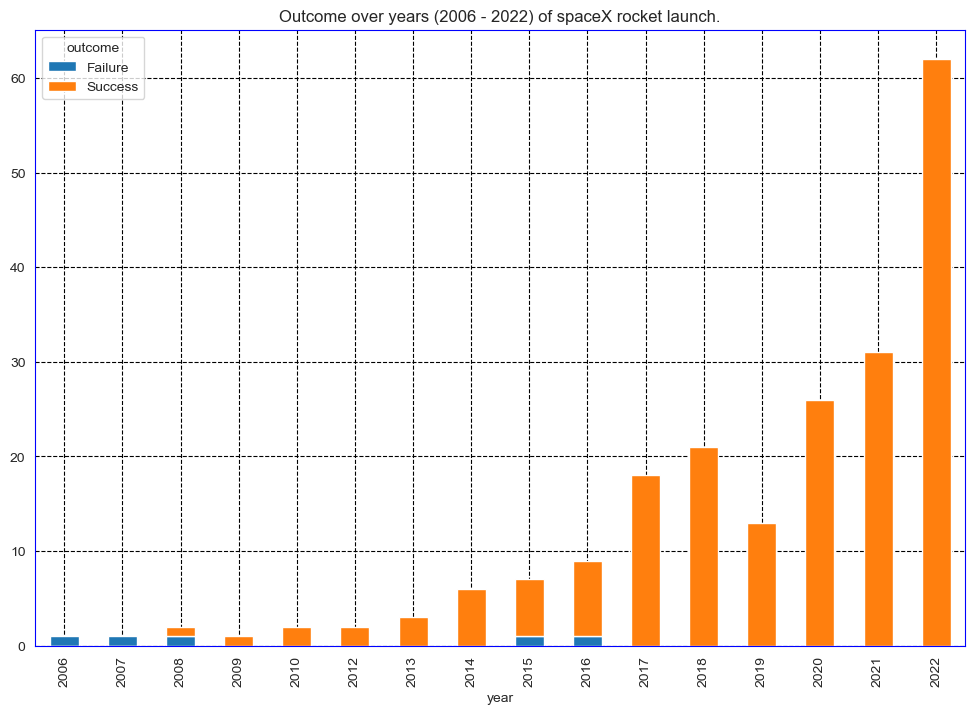

In [19]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title('Outcome over years (2006 - 2022) of spaceX rocket launch.')
plt.show()

**TODO: Describe your observation from chart**

### Early Years (2006 - 2008)
- **2006-2007**: No successful launches were recorded.
- **2008**: The first successful launch is noted, although the number of failures slightly exceeded successes.

### Growth Period (2009 - 2014)
- **2009-2014**: A period of unbroken success with an increasing number of successful launches each year and no recorded failures.

### Matured Success (2015 - 2016)
- **2015-2016**: While a few failures are observed, the number of successful launches significantly outnumbers failures.

### Period of Reliability (2017 - 2022)
- **2017-2018**: The company sees a consistent increase in successful launches with zero failures, indicating improved reliability.
- **2019**: Notably, there is a minor decrease in the number of launches, yet all are successful with no failures.
- **2020-2022**: A marked increase in the number of successful launches, reaching the highest count in the company's history by 2022, with no failures.

### Exploring numerical attributes

In [20]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: missing_ratio, min, lower_quartile, median, upper_quartile, max  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [21]:
def missing_ratio(s):
    return round(s.isnull().sum() / s.shape[0], 1)

def median(df):
    return round(df.median(), 1)
    
def lower_quartile(df):
    return round(df.quantile(0.25), 1)

def upper_quartile(df):
    return round(df.quantile(0.75), 1)
    

In [22]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])
num_col_info_df.round(1)

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,0.3,0.3,0.3,1.0
min,0.0,22.2,1.7,30146.0,NaN
lower_quartile,0.0,70.0,3.7,549054.0,NaN
median,0.0,70.0,3.7,549054.0,NaN
upper_quartile,0.0,70.0,3.7,549054.0,NaN
max,2.0,70.0,12.2,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [23]:
# If an attribute has missing ratio > 0.7, drop it from dataframe
num_col_df = num_col_df.loc[:, num_col_df.apply(missing_ratio) <= 0.7]

In [24]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [25]:
## Mean fill
num_col_df['mean_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mean())

In [26]:
## Median fill
num_col_df['median_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].median())

In [27]:
## Mode fill
num_col_df['mode_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mode().iloc[0])

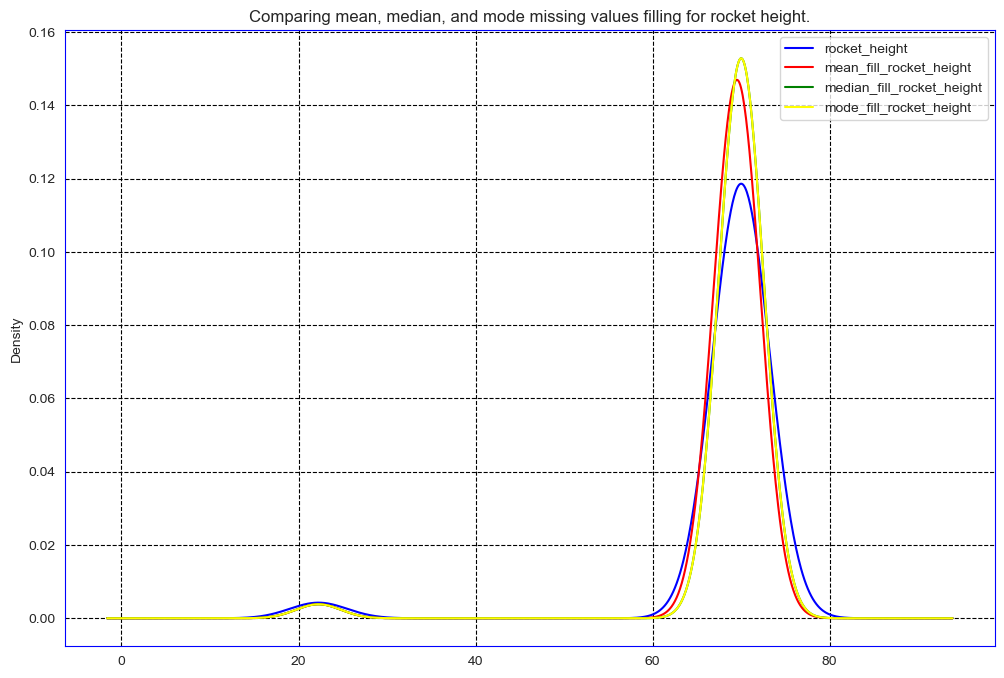

In [28]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"].plot(kind='kde', ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"].plot(kind='kde', ax=ax, color="red")
num_col_df["median_fill_rocket_height"].plot(kind='kde', ax=ax, color="green")
num_col_df["mode_fill_rocket_height"].plot(kind='kde', ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Comparing mean, median, and mode missing values filling for rocket height.')
plt.show()

**TODO: Describe your observation from chart**

- The **blue line** represents the original distribution of the 'rocket_height' data, indicating the density and spread of rocket heights before any imputation.

- The **red line** shows the distribution after missing 'rocket_height' values have been imputed with the mean. The almost perfect overlap with the blue line suggests that the imputed mean values are very close to the original data distribution.

- The **green line** represents median imputation and closely overlaps with the blue and red lines. This overlap implies that the median is similar to the mean, hinting at a symmetric distribution of the data.

- The **yellow line** for mode imputation overlaps with the other lines as well, indicating that the mode is similar to the mean and median, suggesting a strong central peak in the data.

### Key Takeaways:

- The data for 'rocket_height' likely has a **symmetric distribution** since the mean and median are similar.

- A strong central tendency is observed, as indicated by the mode's alignment with the mean and median.

- Imputation of missing values using the mean, median, or mode **does not significantly change the distribution shape**.

- The missing values likely constitute a **small proportion of the data**, or their imputation is such that it does not affect the overall distribution.

Overall, the 'rocket_height' data appears to be well-behaved with a central peak and symmetric distribution, where imputation methods used have maintained the data's structural integrity.


**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [29]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

# Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    # Checking range of height for a given rocket name

    # Args:
    #     rocket_name (str): the name of rocket

    # Returns:
    #     tuple[float, float]: the range, min-max.
    
    # Get the dataframe with the given rocket name
    df = raw_df[raw_df["rocket_name"] == rocket_name]
    
    # Get the min and max height of each rocket
    min_height = df["rocket_height"].min()
    max_height = df["rocket_height"].max()

    return (min_height, max_height)


In [30]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name='Falcon 1')[0] + checking_range(rocket_name='Falcon 1')[1]).encode()) == 33620172

In [31]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name='Falcon 9')[0] + checking_range(rocket_name='Falcon 9')[1]).encode()) == 48627956

In [32]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name='Falcon Heavy')[0] * checking_range(rocket_name='Falcon Heavy')[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [33]:
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    
    # YOUR CODE HERE
    # Fill missing values in `rocket_height` with the mean value of the corresponding rocket name
    # Get the mean value of min and max height for each rocket
    mean_height = cp_df.groupby('rocket_name')['rocket_height'].agg(['min', 'max']).mean(axis=1)

    # Fill missing values in `rocket_height` with the mean value of the corresponding rocket name
    cp_df['rocket_height'] = cp_df['rocket_height'].fillna(cp_df['rocket_name'].map(mean_height))

    return cp_df

raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [34]:
raw_df["rocket_diameter"] = raw_df["rocket_diameter"].fillna(raw_df["rocket_diameter"].mean())
raw_df["rocket_mass"] = raw_df["rocket_mass"].fillna(raw_df["rocket_mass"].mean())

In [35]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df = num_col_df.loc[:, num_col_df.apply(missing_ratio) <= 0.7]
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).round(2)

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [36]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max']).round(2)

assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

1. rocket_boosters: This attribute has values like 0.0, 2.0, and shows a missing_ratio of 0.0, indicating it may be a discrete variable. It represents count data, which are typically integers and can be considered as a discrete numerical attribute.
2. rocket_height: The values range from 22.25 to 70.00. Given that height can theoretically take on any value within a range, this is a continuous numerical attribute. However, the quartiles and max all having the same value (70.00) could suggest limited variability or potential errors in the data unless the height is standardized across multiple entries.
3. rocket_diameter: With values from 1.68 to 12.20, this attribute is also continuous, as diameter is a measurement that can have any value within a range.
4. rocket_mass: This attribute ranges from 30146.0 to 1420788.0 and is a continuous variable since mass can vary continuously and is not restricted to integer values.

### Exploring non-numerical attributes

In [37]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [38]:
import ast

def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: "[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]"
        - Output: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]

    Args:
        s (str): String representation of a list of dictionaries
        
    Returns:
        list(dict): The list of dictionaries
    """
    try:
    # Use eval to parse the string, but be cautious with untrusted input
        return eval(s)
    except SyntaxError as e:
        raise ValueError("Invalid string format for a list of dictionaries.") from e


Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [39]:
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
# use explode to expand the list of dictionaries into rows
cate_col_df = cate_col_df.explode('payloads')
# convert this column to str
cate_col_df['payloads'] = cate_col_df['payloads'].astype(str)
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: missing_ratio, num_values, value_ratios

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [40]:
def missing_ratio(s):
    # TODO:
    return round(s.isna().mean() * 100, 1)

def num_values(s):
    # TODO:
    return s.nunique()

def value_ratios(s):
    # TODO:
    return (s.value_counts(normalize=True) * 100).round(1).to_dict()

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,147,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 11.5, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [41]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

- landpad_name: 27.3
- landpad_type: 23.9
- landpad_region: 47.4

These are less than 70%, so we should not delete these attribute columns

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [42]:
# Drop rows where landpad_name, landpad_type, and landpad_region are all NaN
cate_col_df = cate_col_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], how='all')

# Drop rows where at least 2 of the 3 columns have NaN values
cate_col_df = cate_col_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], thresh=2)

In [43]:
# TEST
cate_col_df[cate_col_df['landpad_name'].isnull() & cate_col_df['landpad_type'].isnull() & cate_col_df['landpad_region'].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [44]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

- Falcon 9 rockets which have launchpad in California and have landpad in Florida that have no missing values.
- Falcon 9 rockets which have launchpad in California and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, repectively.
- Falcon 9 rockets which have launchpad in California and have landpad in California that have no missing values. Their land name and type are LZ-4 and RTLS, repectively.
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. Their land name and type are LZ-1 and RTLS, respectively.
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. Their land name and type are JRTI-1 and ASDS, respectively.
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. Their land name and type are JRTI and ASDS, respectively.

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?
- Falcon 9 rockets which have landpad name is `LZ-1`, and landpad type is `RTLS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `LZ-4`, and landpad type is `RTLS` => landpad region `California`

**Observation 3**
- Falcon Heavy rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region California

In [45]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe based on specific rules.

    Args:
        df (pd.DataFrame): Input dataframe

    Returns:
        pd.DataFrame: Output dataframe with filled missing values in landpad region
    """
    if df is None:
        raise ValueError("Input dataframe is None")
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # Rule 1: Falcon 9, OCISLY, ASDS => California
    mask1 = (df_cp['rocket_name'] == 'Falcon 9') & \
            (df_cp['landpad_name'] == 'OCISLY') & \
            (df_cp['landpad_type'] == 'ASDS')
    df_cp.loc[mask1, 'landpad_region'] = 'California'
    
    # Rule 2: Falcon 9, JRTI or ASOG, ASDS => Florida
    mask2 = (df_cp['rocket_name'] == 'Falcon 9') & \
            (df_cp['landpad_name'].isin(['JRTI', 'ASOG'])) & \
            (df_cp['landpad_type'] == 'ASDS')
    df_cp.loc[mask2, 'landpad_region'] = 'Florida'
    
    # Rule 3: Falcon 9, LZ-1, RTLS => Florida
    mask3 = (df_cp['rocket_name'] == 'Falcon 9') & \
            (df_cp['landpad_name'] == 'LZ-1') & \
            (df_cp['landpad_type'] == 'RTLS')
    df_cp.loc[mask3, 'landpad_region'] = 'Florida'
    
    # Rule 4: Falcon 9, LZ-4, RTLS => California
    mask4 = (df_cp['rocket_name'] == 'Falcon 9') & \
            (df_cp['landpad_name'] == 'LZ-4') & \
            (df_cp['landpad_type'] == 'RTLS')
    df_cp.loc[mask4, 'landpad_region'] = 'California'

    # Rule 5: Falcon Heavy, OCISLY, ASDS => California
    mask5 = (df_cp['rocket_name'] == 'Falcon Heavy') & \
            (df_cp['landpad_name'] == 'OCISLY') & \
            (df_cp['landpad_type'] == 'ASDS')
    df_cp.loc[mask5, 'landpad_region'] = 'California'
    
    return df_cp

# Apply the function to fill missing values in the landpad region
cate_col_df = fill_landpadregion(cate_col_df)

In [46]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

# print all the row has landpad_name is LZ-1
# cate_col_df[cate_col_df['landpad_type'] == 'RTLS']
# Print all the row has missing value in landpad_name or landpad_type or landpad_region
# cate_col_df[cate_col_df['landpad_name'].isnull() | cate_col_df['landpad_type'].isnull() | cate_col_df['landpad_region'].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [47]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [48]:
raw_df['payloads'] = raw_df['payloads'].apply(str2dict)
raw_df = raw_df.explode('payloads')
raw_df['payloads'] = raw_df['payloads'].astype(str)

raw_df = fill_landpadregion(raw_df)

# Drop rows where landpad_name, landpad_type, and landpad_region are all NaN
raw_df = raw_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], how='all')

# Drop rows where at least 2 of the 3 columns have NaN values
raw_df = raw_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], thresh=2)

# # Drop columns if missing ratio = 1
raw_df = raw_df.loc[:, raw_df.apply(missing_ratio) <= 0.7]

In [49]:
# TEST 01
assert raw_df.shape == (152, 16)

In [50]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [51]:
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].to_list())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
18,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3669.0,GTO
21,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,5875.0,SSO
23,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Satellite,9600.0,PO
24,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,5200.0,GTO
25,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3700.0,GTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN,NaN,NaN
183,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,NaN,NaN,NaN
184,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN,NaN,NaN
185,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN,NaN,NaN


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [52]:
cate_col_df2 = cate_col_df2.dropna(subset=['type', 'mass', 'orbit'], how='all')

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [53]:
# YOUR CODE HERE
missing_mass_row = cate_col_df2[cate_col_df2['mass'].isnull()]

In [54]:
missing_mass_row.to_csv('./data/unknow_mass_spaceX_launch.csv', index=False)
# cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [55]:
cate_col_df2.drop(missing_mass_row.index, inplace=True)

# cate_col_df2.drop(drop_idx, inplace=True)
# cate_col_df2.reset_index(drop=True, inplace=True)

cate_col_df2.agg([missing_ratio, num_values, value_ratios])

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,107,2,3,2,3,6,2,2,4,2,4,74,11
value_ratios,"{'CRS-5': 0.9, 'Crew-2': 0.9, 'Starlink-22 (v1.0)': 0.9, 'Starlink-21 (v1.0)': 0.9, 'Starlink-20...","{'Falcon 9': 97.2, 'Falcon Heavy': 2.8}","{'CCSFS SLC 40': 50.5, 'KSC LC 39A': 34.6, 'VAFB SLC 4E': 15.0}","{'Florida': 85.0, 'California': 15.0}","{'(28.5618571, -80.577366)': 50.5, '(28.6080585, -80.6039558)': 34.6, '(34.632093, -120.610829)'...","{'OCISLY': 49.5, 'JRTI': 22.4, 'LZ-1': 15.0, 'ASOG': 7.5, 'LZ-4': 3.7, 'JRTI-1': 1.9}","{'ASDS': 81.3, 'RTLS': 18.7}","{'California': 53.3, 'Florida': 46.7}","{'(33.7291858, -118.262015)': 57.0, '(28.4104, -80.6188)': 24.3, '(28.485833, -80.544444)': 15.0...","{'Success': 98.1, 'Failure': 1.9}","{'Satellite': 86.0, 'Dragon 1.1': 4.7, 'Crew Dragon': 4.7, 'Dragon 2.0': 4.7}","{15600.0: 15.9, 13260.0: 11.2, 3681.0: 1.9, 9600.0: 1.9, 2200.0: 1.9, 14760.0: 1.9, 3500.0: 1.9,...","{'VLEO': 45.8, 'GTO': 13.1, 'ISS': 13.1, 'SSO': 8.4, 'PO': 5.6, 'LEO': 5.6, 'MEO': 3.7, 'TLI': 1..."


In [56]:
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])


c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [57]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
raw_df['payloads'] = raw_df['payloads'].apply(str2dict)
# raise NotImplementedError()

In [58]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df = raw_df.join(pd.DataFrame(raw_df['payloads'].to_list())).drop('payloads', axis=1)
raw_df.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'}, inplace=True)
# raise NotImplementedError()

In [59]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
raw_df = raw_df.dropna(subset=['payloads_type', 'payloads_mass', 'payloads_orbit'], how='all')
raw_df = raw_df.dropna(subset=['payloads_type', 'payloads_mass', 'payloads_orbit'], thresh=2)
# raise NotImplementedError()

In [60]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
missing_mass_row = raw_df[raw_df['payloads_mass'].isnull()]
missing_mass_row.to_csv('./data/unknow_mass_spaceX_launch.csv', index=False)
raw_df.drop(missing_mass_row.index, inplace=True)
# raise NotImplementedError()

In [61]:
# TEST
# raw_df['payloads_mass'] = raw_df['payloads_mass'].astype('str')
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [62]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3669.0,GTO
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,5875.0,SSO
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Satellite,9600.0,PO
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,5200.0,GTO
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,3700.0,GTO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [63]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    try:
        # Use eval to convert the string to a tuple
        result = eval(s)
        # Check if the result is indeed a tuple
        if not isinstance(result, tuple):
            raise ValueError("Input string is not a tuple.")
        return result
    except (SyntaxError, ValueError) as e:
        # Catch both SyntaxError and ValueError to handle different error scenarios
        raise ValueError("Invalid input string.") from e
    
    # raise NotImplementedError()

In [64]:
# Apply str2tuple
raw_df['launchpad_geo'] = raw_df['launchpad_geo'].apply(str2tuple)
raw_df['landpad_geo'] = raw_df['landpad_geo'].apply(str2tuple)

In [65]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [66]:
raw_df = raw_df.drop(['launchpad_geo', 'landpad_geo'], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Satellite,3669.0,GTO,28.561857,-80.577366,28.410400,-80.618800
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Satellite,5875.0,SSO,28.561857,-80.577366,28.410400,-80.618800
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Satellite,9600.0,PO,28.561857,-80.577366,33.729186,-118.262015
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,5200.0,GTO,28.561857,-80.577366,28.485833,-80.544444
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,3700.0,GTO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `label encoding`, and for `nominal` attributes, you should use `one hot encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

launch_name is nominal

In [67]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launch_name'])
# raise NotImplementedError()

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

rocket_name: No meaningful order and ranking -> nominal

In [68]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['rocket_name'], dtype=np.int32)
# raise NotImplementedError()

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

launchpad_name: nominal

In [69]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_name'])
# raise NotImplementedError()

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

launchpad_region is nominal

In [70]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_region'])
# raise NotImplementedError()

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

landpad_name is nominal

In [71]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_name'], dtype=np.int32)
# raise NotImplementedError()

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

landpad_type: nominal

In [72]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_type'])
# raise NotImplementedError()

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

landpad_region: nominal

In [73]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_region'])
# raise NotImplementedError()

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

outcome: is success or fail, it is nominal

In [74]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['outcome'])
# raise NotImplementedError()

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

payloads_type: is ordinal

In [75]:
# YOUR CODE HERE
label_encoder = LabelEncoder()
raw_df['payloads_type'] = label_encoder.fit_transform(raw_df['payloads_type'])

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

payloads_orbit: is ordinal

In [76]:
# YOUR CODE HERE
raw_df['payloads_orbit'] = label_encoder.fit_transform(raw_df['payloads_orbit'])

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [78]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [79]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-2,launch_name_Crew-3,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-76,launch_name_NROL-87,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transporter-1,launch_name_Transporter-2,launch_name_Transporter-3,launch_name_Turksat 5A,launch_name_Türksat 5B,launch_name_ZUMA,rocket_name_Falcon 9,rocket_name_Falcon Heavy,launchpad_name_CCSFS SLC 40,launchpad_name_KSC LC 39A,launchpad_name_VAFB SLC 4E,launchpad_region_California,launchpad_region_Florida,landpad_name_ASOG,landpad_name_JRTI,landpad_name_JRTI-1,landpad_name_LZ-1,landpad_name_LZ-4,landpad_name_OCISLY,landpad_type_ASDS,landpad_type_RTLS,landpad_region_California,landpad_region_Florida,outcome_Failure,outcome_Success
18,2015-01-10 09:47:00+00:00,0,70.0,3.7,549054.000000,3,3669.0,1,28.561857,-80.577366,28.410400,-80.618800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
21,2015-04-14 20:10:00+00:00,0,70.0,3.7,549054.000000,3,5875.0,8,28.561857,-80.577366,28.410400,-80.618800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

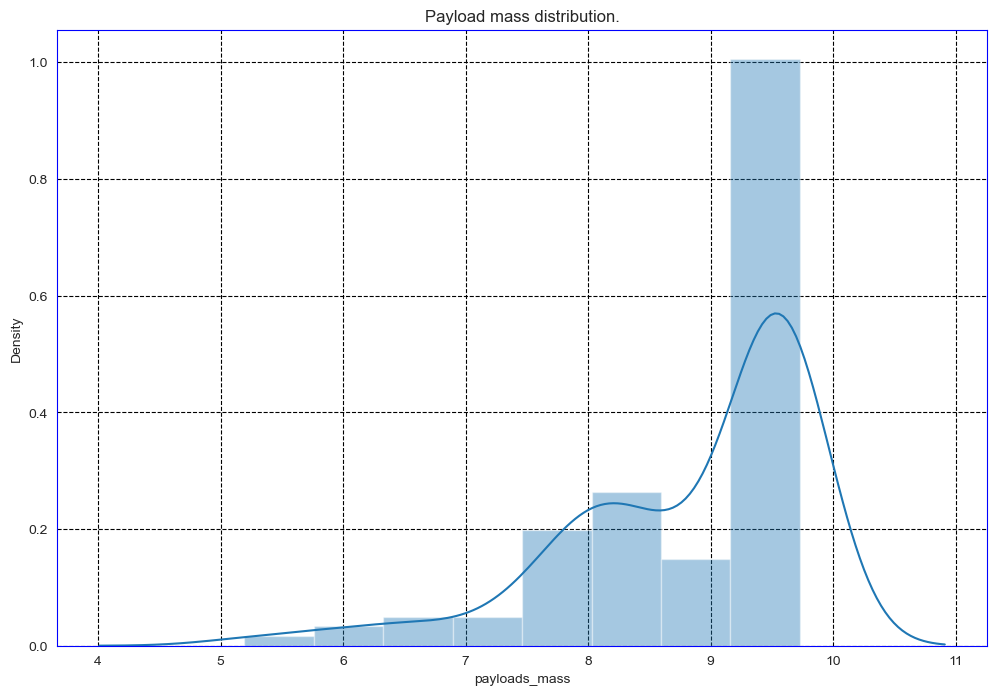

In [80]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title('Payload mass distribution.')
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [81]:
# YOUR CODE HERE
# Total payloads mass range by subtracting the minimum mass from the maximum mass
mass_range = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()

In [82]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and lower bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [83]:
# YOUR CODE HERE
lower_interval = np.floor(raw_df['payloads_mass'].min()).astype(int)
upper_interval = np.ceil(raw_df['payloads_mass'].max()).astype(int)

In [84]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [85]:
# YOUR CODE HERE
interval_size = (upper_interval - lower_interval) / 4
total_bins = 4

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [86]:
# YOUR CODE HERE
kbins = KBinsDiscretizer(n_bins=total_bins, encode='ordinal', strategy='uniform')
raw_df['payloads_mass_bins'] = kbins.fit_transform(raw_df['payloads_mass'].values.reshape(-1, 1)).astype(int)

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [87]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=total_bins, labels=False)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

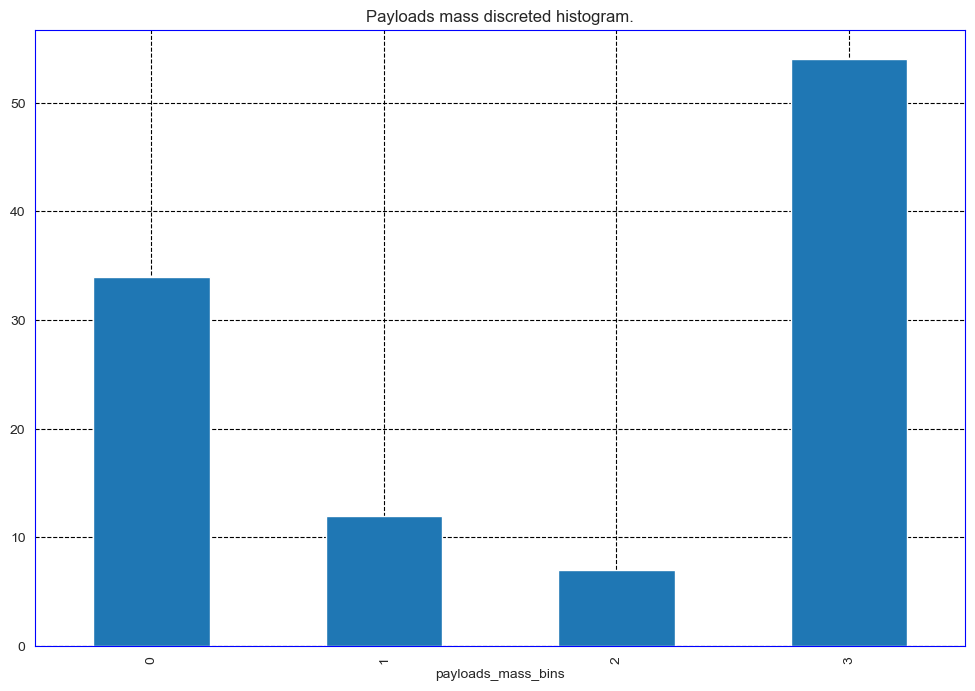

In [88]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title('Payloads mass discreted histogram.')
plt.show()

**TODO: Describe your observation from chart**

- With 4 bins, I have an observation that: 
  - The data distribution is heavily skewed, with a majority of payloads falling into the heaviest bin (no.3).
  - Medium-weight payloads (bins no.1 and no.2) are significantly less common, suggesting that payloads are typically designed to be either very light or very heavy.
  - There is also a considerable number of payloads in the lightest bin (no.0), which might represent low-cost missions, experimental payloads, or small satellites.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the [qcut() method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [89]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.qcut(raw_df['payloads_mass'], q=total_bins, labels=False, duplicates='drop')

- Step 02: Create bin labels

In [90]:
# YOUR CODE HERE
bin_labels = [f'bin_{i+1}' for i in range(total_bins)]

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [91]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=total_bins, labels=bin_labels)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

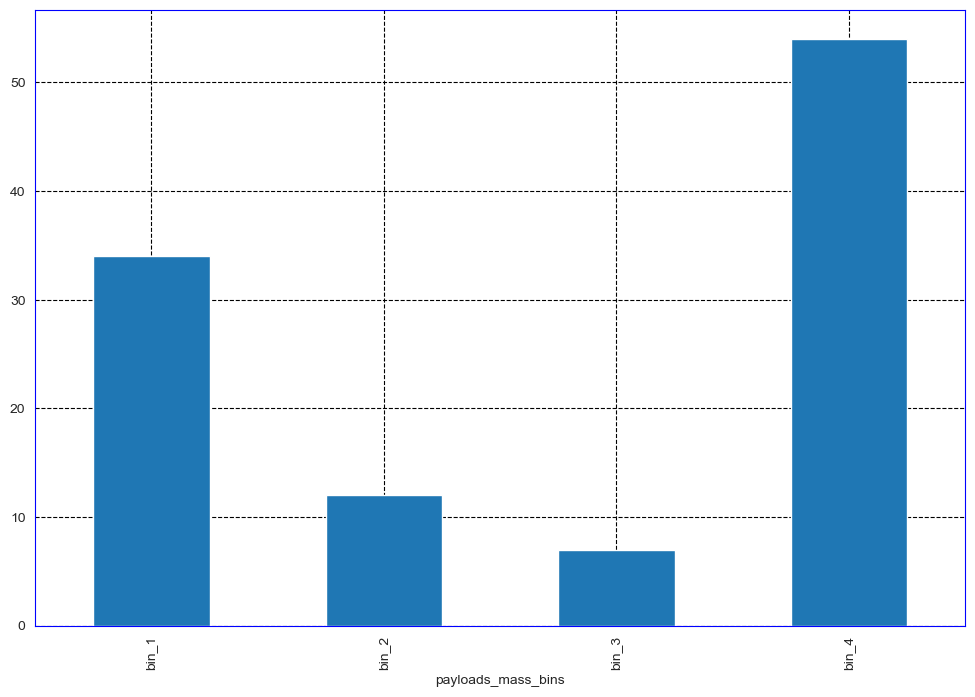

In [92]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

In [93]:
# YOUR CODE HERE (Optional)
# raise NotImplementedError()

In [94]:
# Exclude bins for next section
raw_df = raw_df.drop(['payloads_mass_bins'], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

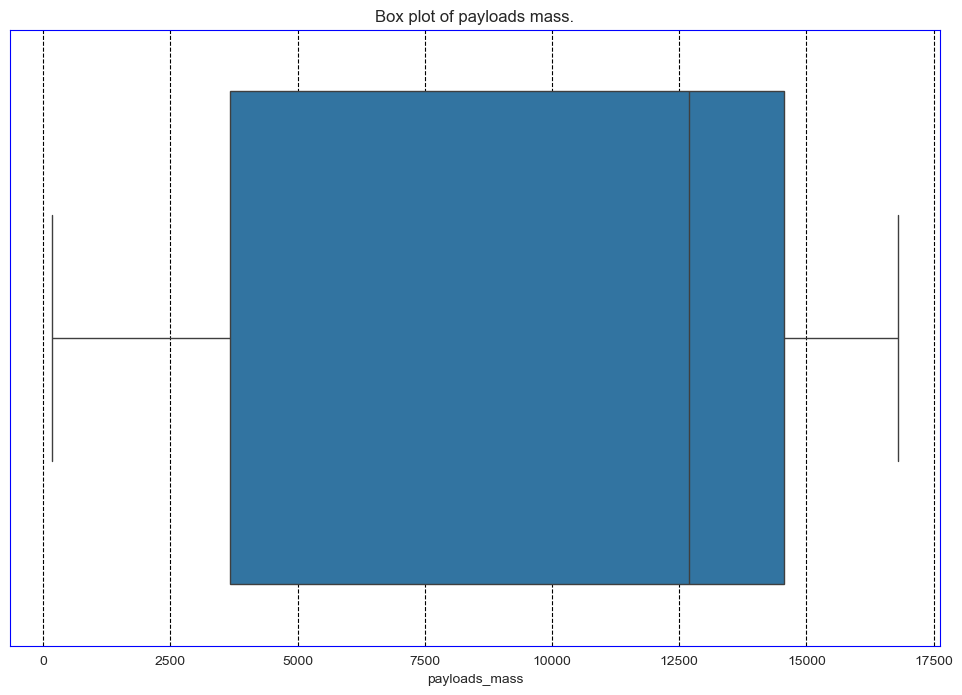

In [95]:
# YOUR CODE HERE
sns.boxplot(x=raw_df['payloads_mass'])
plt.title('Box plot of payloads mass.')
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [96]:
IQR = raw_df['payloads_mass'].quantile(0.75) - raw_df['payloads_mass'].quantile(0.25)

lower_payloads_mass_limit = raw_df['payloads_mass'].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df['payloads_mass'].quantile(0.75) + (IQR * 1.5)

print(f'The lower bound for payloads limitation: {lower_payloads_mass_limit}')
print(f'The upper bound for payloads limitation: {upper_payloads_mass_limit}')

The lower bound for payloads limitation: -12649.5
The upper bound for payloads limitation: 30882.5


- Step 03: Construct rule for trimming outliers.

In [97]:
payloadsmass_outliers = np.where(
    raw_df['payloads_mass'] > upper_payloads_mass_limit,
    True,
    np.where(raw_df['payloads_mass'] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [98]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((107, 138), (107,))

TODO: What are the advantages and disadvantages of outlier trimming?

### Advantages:
1. Improved Model Accuracy: It can skew statistical measures and models, so, removing them can improve the accuracy of the models for the remaining data.
2. Better Normality: It can make the data more normally distributed.
3. Noise Reduction: Outliers may represent noise, especially if they result from errors or anomalies. Trimming can clean the data, leading to more reliable analysis.
4. Simplified Visualization: Outliers can distort graphs, making it hard to interpret the core data. Trimming can lead to clearer visualizations that better represent the majority of the data.
5. Mitigate Overfitting: In machine learning, models can overfit to outliers. Removing them can reduce the chances of overfitting and improve model generalization.

### Disadvantages:
1. Loss of Information: Outliers may contain valuable information about the dataset or indicate special cases. Trimming them can lead to the loss of this information.
2. Biased Data: Removing outliers can introduce bias if the outliers are a legitimate part of the population.
3. Masking Effects: If outliers are a result of an underlying problem or pattern, removing them may prevent the detection of these issues.
4. Arbitrary Decision: Determining what constitutes an outlier can be subjective. The decision to trim can be arbitrary and may not reflect an objective criterion.
5. Impact on Distribution: Trimming outliers can change the underlying distribution of the data, which can affect statistical tests and interval estimates.

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

- The Interquartile Range (IQR) is a measure of statistical dispersion and is often used to detect outliers. The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.

- **Lower Fence:** Q1 - 1.5 * IQR
- **Upper Fence:** Q3 + 1.5 * IQR

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [99]:
upper_bound = raw_df['payloads_mass'].mean() + 3 * raw_df['payloads_mass'].std()
lower_bound = raw_df['payloads_mass'].mean() - 3 * raw_df['payloads_mass'].std()

- Step 02: Construct rule for trimming outliers.

In [100]:
outliers = (raw_df['payloads_mass'] > upper_bound) | (raw_df['payloads_mass'] < lower_bound)

- Step 03: Trimming outliers

In [101]:
raw_df = raw_df.loc[~outliers]

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

### Advantages and Disadvantage of using mean and standard deviation:

**Advantages:**
1. Measure of Spread: Standard deviation provides a quantifiable estimate of the variability within a data set.
2. Normal Distribution Compatibility: It is particularly useful when dealing with data that is normally distributed, as about 68% of data falls within one standard deviation of the mean, 95% within two, and 99.7% within three standard deviations (68-95-99.7 rule).
3. Comparison Between Datasets: It allows for a comparison of the spread of two or more datasets on the same scale, even if the means differ.
4. Anomaly Detection: Standard deviation can be used to detect outliers in a dataset (values that are a certain number of standard deviations away from the mean are often considered outliers).
5. Foundation in Statistical Inference: It's used in hypothesis testing, confidence interval construction, and in various other statistical methods.

**Disadvantages:**

1. Sensitivity to Outliers: Standard deviation is highly sensitive to outliers, as it takes into account all values equally when calculating the spread.
2. Assumption of Normality: It may not provide meaningful insights for distributions that are not normal, as the rule of thumb percentages for distribution within one, two, or three standard deviations of the mean do not hold.
3. Squared Units: Because it's the square root of the variance, standard deviation is expressed in squared units, which can sometimes be difficult to interpret in the context of the original data.
4. Not Robust: For skewed distributions, the standard deviation might not give an accurate picture of data variability.
5. Can Be Misleading: Without the context of the mean and the shape of the distribution, the standard deviation alone might not be a clear indicator of spread. 

### Quartile distance normally:

- When capping outliers using the mean and standard deviation, the commonly used distances are in multiples of the standard deviation from the mean. Unlike the IQR method which uses the quartiles, this method relies on the mean and the standard deviation to define what is considered an outlier.

  - A data point is considered a "mild" outlier if it is more than 2 standard deviations away from the mean.
  - A data point is considered an "extreme" outlier if it is more than 3 standard deviations away from the mean.

- These thresholds are based on the empirical rule, also known as the 68-95-99.7 (three-sigma) rule, which applies to normally distributed data and states that:
  - Approximately 68% of data falls within one standard deviation of the mean.
  - Approximately 95% of data falls within two standard deviations of the mean.
  - Approximately 99.7% of data falls within three standard deviations of the mean.

- Therefore, values that fall outside of 2 or 3 standard deviations from the mean can be considered outliers. Specifically:
  - Mild Outliers: Mean ± 2 * Standard Deviation
  - Extreme Outliers: Mean ± 3 * Standard Deviation

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [102]:
upper_bound = raw_df['payloads_mass'].quantile(0.90)
lower_bound = raw_df['payloads_mass'].quantile(0.10)

- Step 02: Construct rule for trimming outliers.

In [103]:
outliers = (raw_df['payloads_mass'] > upper_bound) | (raw_df['payloads_mass'] < lower_bound)

- Step 03: Trimming outliers

In [104]:
raw_df = raw_df.loc[~outliers]

TODO: What are the advantages and disadvantages of using Quantiles?

**Advantages of Using Quantiles:**
1. Non-parametric: Quantiles do not assume an underlying distribution for the data, making them applicable to any data set, whether it's normally distributed or not.
2. Robustness: They are less affected by outliers and skewed data than parametric statistics like means and standard deviations.
3. Data Segmentation: Quantiles can effectively divide a data set into segments that can be analyzed separately, which is useful for performance comparisons, such as breaking down test scores into quartiles.
4. Understanding Distribution: They help to understand the distribution of the data by indicating where the data values lie in the distribution.
5. Customization: They allow for flexible data analysis, where analysts can choose any number of quantiles to get the resolution of data segmentation they need.
6. Fairness in Analysis: Quantiles are often used for creating fair and balanced groups because each quantile contains the same number of data points.

**Disadvantages of Using Quantiles:**
1. Loss of Information: Quantiles provide a summary by nature, which can lead to a loss of detailed information about the data distribution.
2. Arbitrary Grouping: The cut-off points for quantiles might create arbitrary groups that do not have inherent meaning in the data.
3. Sensitivity to Sample Size: The exact values of quantiles can change with the sample size, which can affect the stability of the data analysis, especially with small datasets.
4. Equal Count, Not Value: Each quantile contains an equal number of data points, but not necessarily an equal range of values, which can sometimes be misleading.
5. Potential for Misinterpretation: Without a good understanding of what quantiles represent, they can be misinterpreted. For example, the median (50th percentile) is not always the "average" or most common value.
6. Dependence on Data: The calculation and interpretation of quantiles are heavily dependent on the actual data, and small changes in data can lead to different quantile values.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [105]:
scaler = StandardScaler()

- Step 02: Fitting

In [106]:
scaler.fit(raw_df.drop(['uct_time'], axis=1))

StandardScaler()

- Step 03: Transform data

In [107]:
raw_df_scaled = scaler.transform(raw_df.drop(['uct_time'], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(['uct_time'], axis=1).columns)

- Step 04: Test

In [108]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-2,launch_name_Crew-3,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-76,launch_name_NROL-87,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transporter-1,launch_name_Transporter-2,launch_name_Transporter-3,launch_name_Turksat 5A,launch_name_Türksat 5B,launch_name_ZUMA,rocket_name_Falcon 9,rocket_name_Falcon Heavy,launchpad_name_CCSFS SLC 40,launchpad_name_KSC LC 39A,launchpad_name_VAFB SLC 4E,launchpad_region_California,launchpad_region_Florida,landpad_name_ASOG,landpad_name_JRTI,landpad_name_JRTI-1,landpad_name_LZ-1,landpad_name_LZ-4,landpad_name_OCISLY,landpad_type_ASDS,landpad_type_RTLS,landpad_region_California,landpad_region_Florida,outcome_Failure,outcome_Success
0,-0.150756,0.0,-0.17691,-0.129472,0.389943,-1.261477,-1.719506,-0.419331,0.411627,-1.178111,1.168036,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,0.0,-0.106,-0.106,-0.106,-0.106,-0.106,0.0,-0.106,9.433981,-0.106000,-0.106000,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,0.0,0.0,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,0.0,-0.106,-0.106000,-0.106,-0.106,-0.106,0.0,-0.106,-0.106000,-0.106,-0.106,0.0,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,0.0,0.0,-0.106,-0.

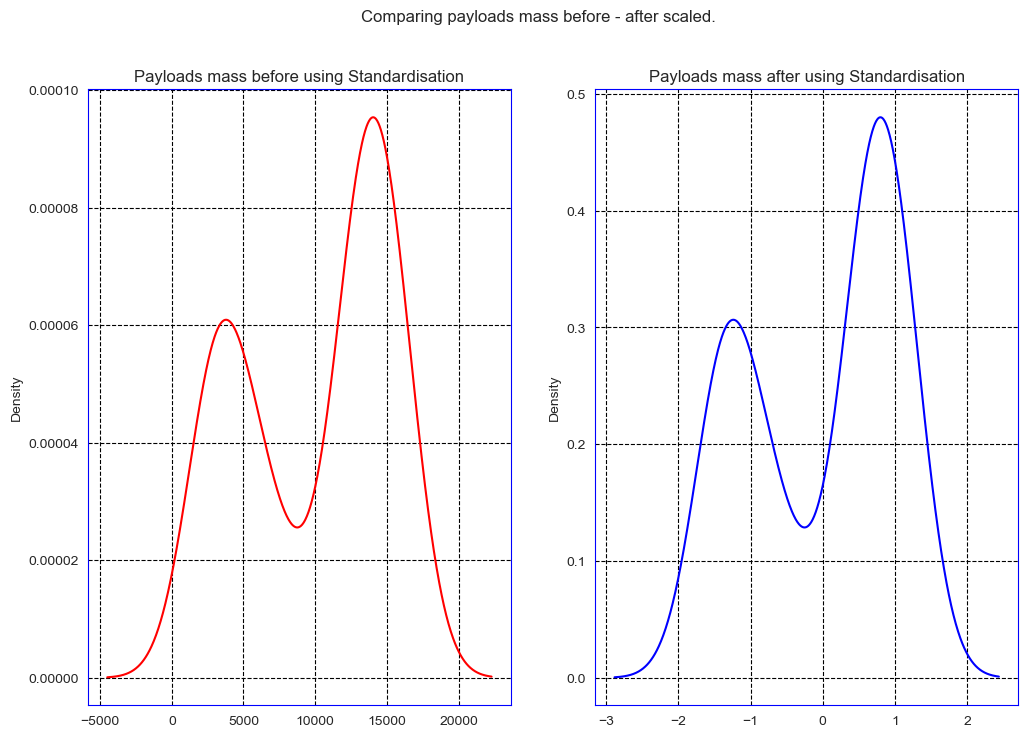

In [109]:
fig, axes = plt.subplots(1, 2)

raw_df['payloads_mass'].plot(kind='kde', ax=axes[0], color='red')
axes[0].set_title('Payloads mass before using Standardisation')

raw_df_scaled['payloads_mass'].plot(kind='kde', ax=axes[1], color='blue')
axes[1].set_title('Payloads mass after using Standardisation')

fig.suptitle('Comparing payloads mass before - after scaled.')

plt.show()

**TODO: Describe your observation from chart**

**Before Standardization (Left Chart - Red Line):**
- The payloads mass values appear to have a bimodal distribution, suggesting two distinct groups or peaks in the data.
- The values are spread across a wide range, with the x-axis spanning from -5000 to beyond 20000.
- The density peaks are not symmetric and are skewed, indicating the non-normal nature of the distribution.

**After Standardization (Right Chart - Blue Line):**
- After standardization, the distribution still appears bimodal but is now centered around the mean (with a mean close to 0).
- The standard deviation seems to have been normalized, as indicated by the x-axis scale, which now roughly spans from -3 to 3, suggesting that most data points lie within three standard deviations from the mean (which aligns with the empirical rule for normally distributed data).
- The peaks appear more symmetric about their modes compared to the original distribution, indicating that the standardization process has scaled the data to a consistent range.

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

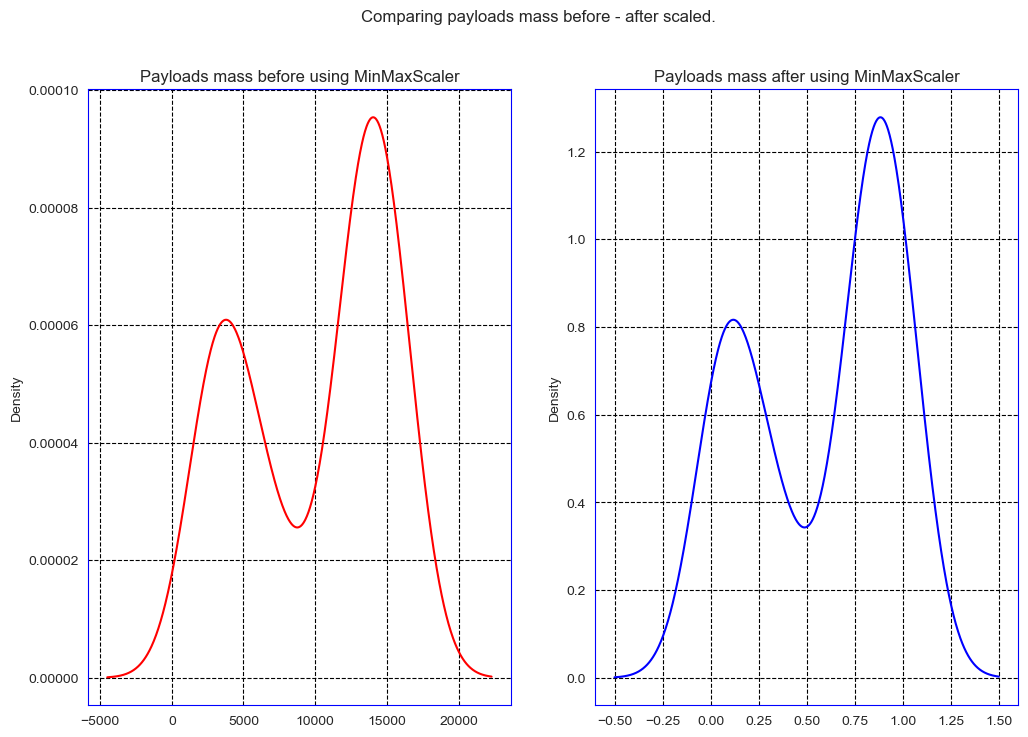

In [110]:
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(raw_df[['payloads_mass']])

raw_df_minmax_scaled = minmax_scaler.transform(raw_df[['payloads_mass']])

raw_df_minmax_scaled = pd.DataFrame(raw_df_minmax_scaled, columns=['payloads_mass'])

# Visualization
fig, axes = plt.subplots(1, 2)

raw_df['payloads_mass'].plot(kind='kde', ax=axes[0], color='red')
axes[0].set_title('Payloads mass before using MinMaxScaler')

raw_df_minmax_scaled['payloads_mass'].plot(kind='kde', ax=axes[1], color='blue')
axes[1].set_title('Payloads mass after using MinMaxScaler')

fig.suptitle('Comparing payloads mass before - after scaled.')

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Before MinMaxScaler (Left Chart - Red Line):**
- The payloads mass distribution appears to be bimodal, with two distinct peaks.
- The range of the payloads mass is quite broad, extending from below 0 to over 20,000.
- The distribution is not symmetric and suggests the presence of two different groups or types of payloads based on their masses.

**After MinMaxScaler (Right Chart - Blue Line):**
- Post scaling, the payloads mass distribution retains its bimodal characteristic, but the values are now within the range of 0 to 1, which is typical after MinMax scaling.
- The peaks are more pronounced and appear taller, which is a result of the density estimates adjusting for the narrower range of values.
- The distribution still shows two modes, indicating that the relative proportions of the payloads' masses to each other remain unchanged.

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**
### Mean Normalization
Mean normalization involves re-scaling features to have a mean of 0 and a range between -1 and 1. The formula for mean normalization is as follows:

$$ x_{normalized} = \frac{x - \text{mean}(x)}{\text{max}(x) - \text{min}(x)} $$

**Pros:**
- Centers the data around 0.
- Useful when you want to ensure zero mean in your features.

**Cons:**
- The resulting distribution will have values between -1 and 1, but the min and max are not bound to these values.
- Can be more affected by outliers than Min/Max scaling.

### Min/Max Scaling
Min/Max scaling, also known as feature range scaling, rescales the feature to a fixed range, typically [0, 1]. The formula for Min/Max scaling is:

$$ x_{scaled} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$

**Pros:**
- Transforms features to a given range [0, 1].
- Preserves the shape of the original distribution and does not reduce the importance of outliers.

**Cons:**
- Sensitive to outliers. A single outlier can reduce the range of the feature values.
- The mean is not necessarily 0.

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

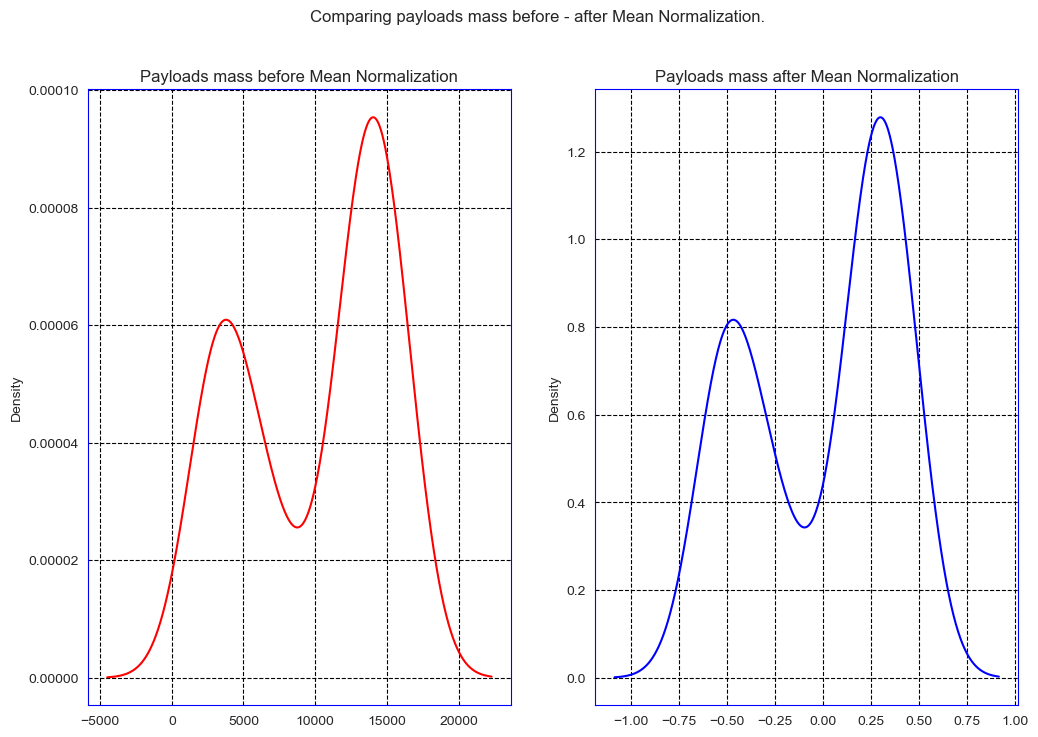

In [111]:
# YOUR CODE HERE
# raise NotImplementedError()

# Using sckit-learn for applying mean normalization to the payloads_mass column
mean_normalizer = StandardScaler(with_std=False)

# Fitting the mean normalizer to the 'payloads_mass' column
mean_normalizer.fit(raw_df[['payloads_mass']])

# Transforming the 'payloads_mass' column using the fitted mean normalizer
raw_df_mean_normalized = mean_normalizer.transform(raw_df[['payloads_mass']])

# Since mean normalization scales data relative to the range, we need to manually divide by the range
range_of_data = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()
raw_df_mean_normalized = raw_df_mean_normalized / range_of_data

# Converting the mean normalized array back into a pandas dataframe
raw_df_mean_normalized = pd.DataFrame(raw_df_mean_normalized, columns=['payloads_mass'])

# Visualization
fig, axes = plt.subplots(1, 2)

raw_df['payloads_mass'].plot(kind='kde', ax=axes[0], color='red')
axes[0].set_title('Payloads mass before Mean Normalization')

raw_df_mean_normalized['payloads_mass'].plot(kind='kde', ax=axes[1], color='blue')
axes[1].set_title('Payloads mass after Mean Normalization')

fig.suptitle('Comparing payloads mass before - after Mean Normalization.')

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Before Mean Normalization (Left Chart - Red Line):**
- The distribution of payloads mass is bimodal, with two clear peaks, suggesting two different groupings or types of payload masses within the dataset.
- The values of payloads mass are spread over a wide range, extending into negative values, which could imply that there are entries with negative mass or that there has been a shift or error in the data collection process.

**After Mean Normalization (Right Chart - Blue Line):**
- After mean normalization, the distribution retains its bimodal nature, indicating that the process does not affect the underlying structure of the data.
- The scale of the x-axis is now approximately between -1 and 1, reflecting that mean normalization re-centers the data around 0 and scales it according to the range of the data.
- The peaks appear to be more pronounced and narrower, which is often a visual effect due to the re-scaling of the axis rather than a change in the underlying distribution.

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

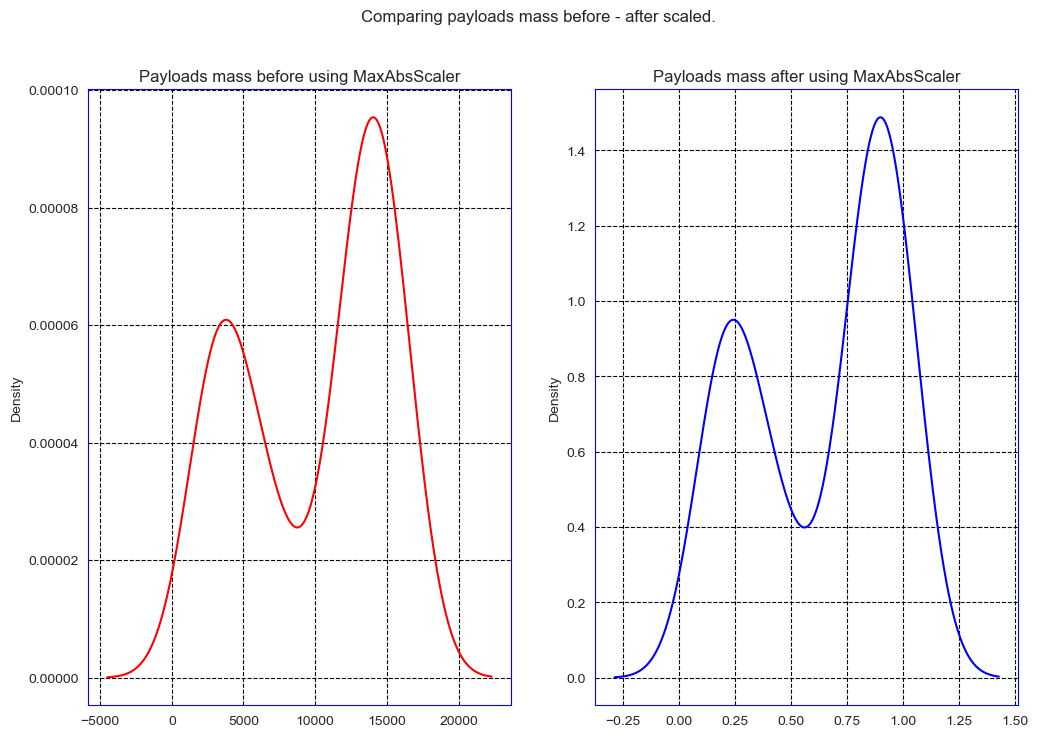

In [112]:
# Using sckit-learn for applying max absolute scaling to the payloads_mass column
maxabs_scaler = MaxAbsScaler()

maxabs_scaler.fit(raw_df[['payloads_mass']])

raw_df_maxabs_scaled = maxabs_scaler.transform(raw_df[['payloads_mass']])

raw_df_maxabs_scaled = pd.DataFrame(raw_df_maxabs_scaled, columns=['payloads_mass'])

# Visualization
fig, axes = plt.subplots(1, 2)

raw_df['payloads_mass'].plot(kind='kde', ax=axes[0], color='red')

axes[0].set_title('Payloads mass before using MaxAbsScaler')

raw_df_maxabs_scaled['payloads_mass'].plot(kind='kde', ax=axes[1], color='blue')

axes[1].set_title('Payloads mass after using MaxAbsScaler')
fig.suptitle('Comparing payloads mass before - after scaled.')
plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Before MaxAbsScaler (Left Chart - Red Line):**
- The distribution exhibits a bimodal pattern, with two prominent peaks that suggest two subsets within the data.
- The mass values range widely, spreading into the negative, which might indicate data entry errors or a need for data cleaning.
- The bimodal distribution implies the presence of two distinct groupings or classifications within the payload mass data.

**After MaxAbsScaler (Right Chart - Blue Line):**
- Following the application of MaxAbsScaler, the bimodal distribution is preserved, indicating the scaling does not alter the intrinsic data structure.
- The x-axis now appears to be scaled between -0.5 and 1.5, suggesting that the absolute maximum value in the original data is now scaled to 1.
- The density peaks seem more pronounced, likely due to the rescaling of the data, which adjusts the density values accordingly.

**General Observations:**
- MaxAbsScaler has rescaled the data so that the maximum absolute value of each feature is scaled to unit size (1).
- This scaling method does not shift/center the data and will not change the location of the zero-point unless there are negative values in the data.
- Both charts maintain the same shape of the distribution, indicating that the relative differences between the data points are preserved.


### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

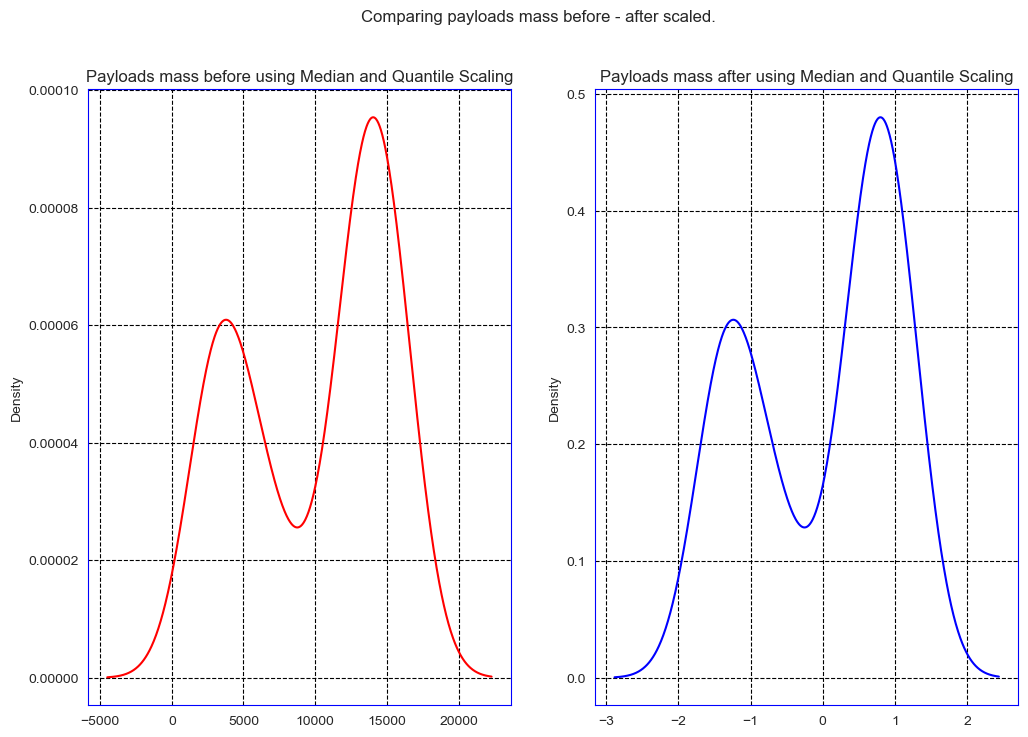

In [113]:
# YOUR CODE HERE
# Using sckit-learn for applying median and quantile scaling to the payloads_mass column
median_scaler = StandardScaler()

median_scaler.fit(raw_df[['payloads_mass']])

raw_df_median_scaled = median_scaler.transform(raw_df[['payloads_mass']])

raw_df_median_scaled = pd.DataFrame(raw_df_median_scaled, columns=['payloads_mass'])

# Visualization

fig, axes = plt.subplots(1, 2)

raw_df['payloads_mass'].plot(kind='kde', ax=axes[0], color='red')

axes[0].set_title('Payloads mass before using Median and Quantile Scaling')

raw_df_median_scaled['payloads_mass'].plot(kind='kde', ax=axes[1], color='blue')

axes[1].set_title('Payloads mass after using Median and Quantile Scaling')

fig.suptitle('Comparing payloads mass before - after scaled.')

plt.show()


**TODO: After visualizing the results, describe your observation from chart**

**Before Median and Quantile Scaling (Left Chart - Red Line):**
- The payloads mass distribution is bimodal, indicating two predominant groupings within the dataset.
- The range of payloads mass extends into negative values, which is unusual and could suggest data entry errors or an offset that should be addressed.
- The two peaks suggest that there might be two types of payloads with different standard mass ranges.

**After Median and Quantile Scaling (Right Chart - Blue Line):**
- The bimodal nature of the distribution is preserved even after scaling, which indicates that the scaling method has not altered the inherent structure of the data.
- The x-axis is now scaled approximately from -3 to 3, which is typical for data that has been scaled based on the median and quantile. This often indicates that the data is now centered around the median and scaled according to the interquartile range.
- The density of the distribution after scaling is more concentrated around the peaks, suggesting a tighter grouping of data points around the median.

**General Observations:**
- Median and quantile scaling has transformed the data to a standard scale where the median is at 0, and the data is spread according to the interquartile range, typically resulting in a range of [-3, 3] for most of the data.
- This type of scaling is robust to outliers and is often used in preparing data for machine learning models that are sensitive to the scale of the data, such as support vector machines and k-nearest neighbors.


### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

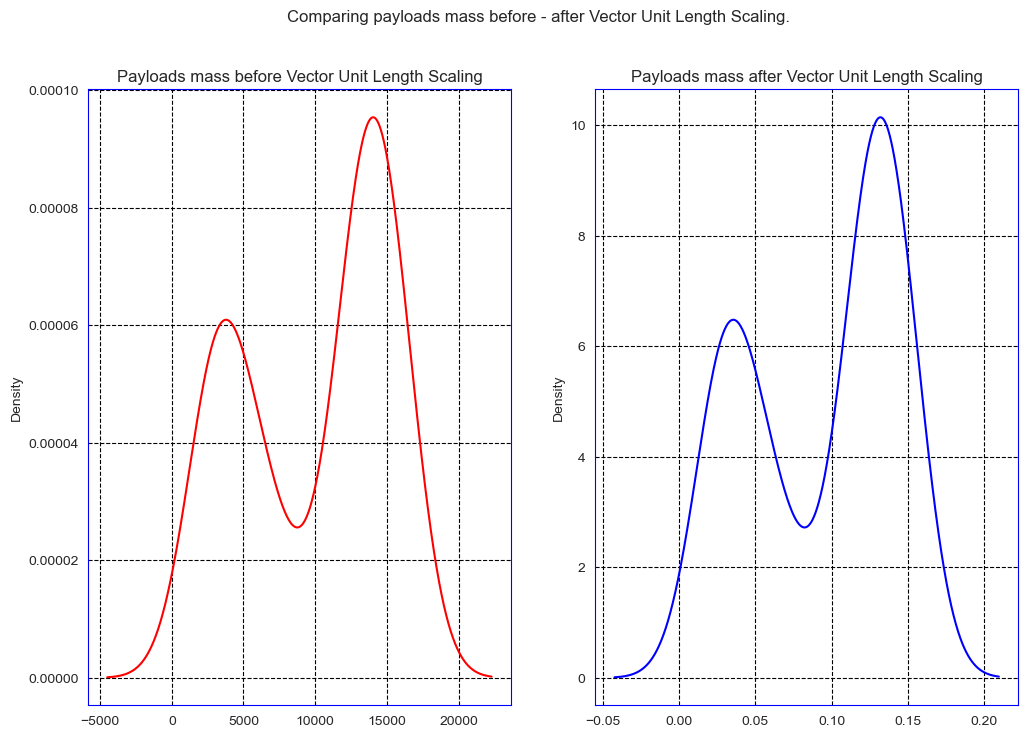

In [114]:
vector_scaler = Normalizer(norm='l2')

# Fitting and transforming the 'payloads_mass' column using the fitted vector_scaler
# raw_df_vector_scaled = vector_scaler.fit_transform(raw_df[['payloads_mass']])
raw_df_vector_scaled = vector_scaler.fit_transform(raw_df[['payloads_mass']].T).T

# Converting the vector scaled array back into a pandas dataframe
raw_df_vector_scaled = pd.DataFrame(raw_df_vector_scaled, columns=['payloads_mass'])


# Visualization
fig, axes = plt.subplots(1, 2)

# # Plotting the original data
raw_df['payloads_mass'].plot(kind='kde', ax=axes[0], color='red')
axes[0].set_title('Payloads mass before Vector Unit Length Scaling')

# # Plotting the data after vector unit length scaling
raw_df_vector_scaled['payloads_mass'].plot(kind='kde', ax=axes[1], color='blue')
axes[1].set_title('Payloads mass after Vector Unit Length Scaling')

fig.suptitle('Comparing payloads mass before - after Vector Unit Length Scaling.')

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Before Vector Unit Length Scaling (Left Chart - Red Line):**
- The distribution of payloads mass is bimodal, with two primary peaks visible, suggesting two different groups within the dataset.
- The data extends over a wide range of mass values, with the leftmost values dipping into the negative, which might be due to data entry errors or specific characteristics of the dataset.

**After Vector Unit Length Scaling (Right Chart - Blue Line):**
- After scaling, the distribution still exhibits a bimodal nature, but the x-axis has been compressed to a very narrow range near zero.
- The density values on the y-axis have increased significantly due to the compression of the x-axis scale.
- The peaks appear more pronounced and the distribution is more condensed, which indicates that the scaling has significantly altered the representation of the data.

**General Observations:**
- The application of vector unit length scaling has resulted in a significant change in the scale of the x-axis, while preserving the bimodal nature of the distribution.
- The extreme condensation of the x-axis and the increased y-axis density values suggest that while the relative distances between data points are maintained, the absolute differences have been reduced.
- This type of scaling is beneficial for algorithms that rely on the normalization of vector lengths, but may not be appropriate for all datasets, especially if the original magnitude of values carries important information.

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

### Min-Max Scaling
- **When to Use**: To scale features to a specific range, typically [0, 1], without distorting differences in the ranges of values or losing information about outliers.
- **Where to Apply**: In algorithms that weigh inputs such as neural networks and those that use distance measures like k-Nearest Neighbors (k-NN).

### Mean Normalization
- **When to Use**: To center the data around zero and scale based on the data range, without assuming a normal distribution.
- **Where to Apply**: As an alternative to standardization without scaling the variance, especially when outliers are not to be heavily weighted.

### MaxAbsScaler
- **When to Use**: To scale each feature by its maximum absolute value within the range [-1, 1] for data already centered at zero.
- **Where to Apply**: For sparse data or data that is already centered at zero without outliers.

### Normalizer (L1 or L2 Norm)
- **When to Use**: To normalize feature vectors rather than individual features, scaling rows to have unit norms, with the choice between L1 and L2 norms depending on the desired impact of feature values.
- **Where to Apply**: In text classification and clustering with high-dimensional data, such as with TF-IDF weighting of words in documents.

### When Not to Use Normalization:
- With algorithms like decision trees and random forests that do not require feature scaling.
- When the scale of the feature does not affect the algorithm, as with tree-based methods.

### General Guidelines:
- **Data Understanding**: Understand the distribution and nature of data before applying normalization.
- **Model Requirements**: Consider whether the algorithm inherently requires scaling.
- **Preservation of Information**: Choose a method that preserves important information.
- **Outlier Impact**: Consider the effects of outliers on the scaling method chosen.
- **Efficiency**: Some large datasets with high dimensionality may benefit more from specific scalers.

It is critical to apply the same transformation to both the training and testing datasets to maintain consistency in the model's input space.

End of your lab 01.